Importaciones

In [297]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing as ps

In [298]:
Datos = pd.read_excel('Datos_anonimizados_sin_llave.xlsx')
Datos

,AntencionPaciente llave,vGenero,EdadEgreso,Año_Salida,MES,Tipo_Afiliacion,Aseguradora,Modalidad_Contrato,Aseguradora2,Hospitalizacion,...,DiasEstanciaClinica,DiasEstanciaClinica_exacto,MODALIDAD,SERVICIO_ADMITE,ID_Medico_registra,NombreTipoDiagnostico,Tipo_egreso,Transfusiones,Antioboticos,UCI_UCE
0,1,0,62,2022,Abril,2,69,1,43,3,...,1,1.048533,2,4,155,1,0,NO,NO,NO
1,2,1,89,2022,Marzo,2,48,2,32,7,...,4,3.943370,4,7,561,0,0,NO,NO,NO
2,3,1,90,2023,Septiembre,2,48,2,43,3,...,2,1.794684,4,8,5,0,2,NO,SI,NO
3,4,1,88,2022,Enero,2,69,1,43,3,...,3,2.564836,4,8,1,0,0,NO,SI,NO
4,5,0,89,2023,Agosto,3,69,1,43,3,...,5,5.486410,4,8,167,0,0,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43149,43150,0,19,2023,Septiembre,2,48,1,43,3,...,2,2.565230,4,8,171,1,0,NO,NO,NO
43150,43151,0,31,2023,Septiembre,2,48,1,43,3,...,1,1.837406,4,8,555,1,0,NO,NO,NO
43151,43152,0,13,2023,Septiembre,2,48,1,43,8,...,1,1.015388,4,10,478,0,0,NO,NO,NO
43152,43153,1,6,2023,Septiembre,1,26,1,43,3,...,2,1.582988,4,10,242,0,0,NO,SI,NO


Se eligieron los datos de estancia exactos y enteros para visualizar en caja de bigotes y mirar la distribución de los datos, se encontró que los datos clinica_exacto tenian unos datos por encima de 4000

{'whiskers': [<matplotlib.lines.Line2D at 0x21d59c84b10>,
 'caps': [<matplotlib.lines.Line2D at 0x21d57029190>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d577c3850>],
 'medians': [<matplotlib.lines.Line2D at 0x21d55fa6690>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d55fa5b10>],
 'means': []}

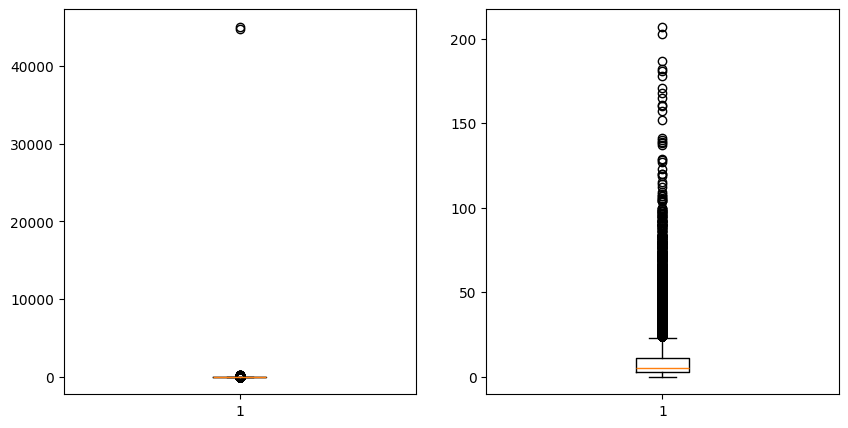

In [299]:
Datos2 = Datos.loc[:,['DiasEstanciaClinica_exacto', 'DiasEstanciaClinica']]
fig,axis = plt.subplots(1, 2, figsize=(10,5))
axis[0].boxplot(Datos2['DiasEstanciaClinica_exacto'])
axis[1].boxplot(Datos2['DiasEstanciaClinica'])


Se filtran los datos anteriormente nombrados para su posterior eliminación

In [300]:
Datos2[Datos2['DiasEstanciaClinica_exacto']>4000] 

,DiasEstanciaClinica_exacto,DiasEstanciaClinica
11314,45068.558090,0
30453,44785.759144,0


Se eliminan

In [301]:
Datos2.drop([11314, 30453] , axis=0, inplace=True)

Se vuelve a comprobar enla caja de bigotes y se decide finalmente utilizar los datos exactos al ser datos flotantes que entregan una mejor información sobre los dias de estancia de un paciente.

{'whiskers': [<matplotlib.lines.Line2D at 0x21d59a191d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21d59a188d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d577bc610>],
 'medians': [<matplotlib.lines.Line2D at 0x21d55fba790>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d55fb92d0>],
 'means': []}

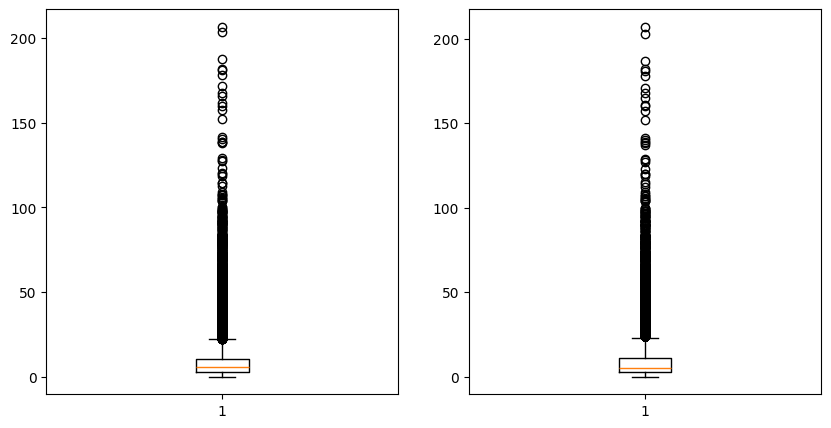

In [302]:
fig,axis = plt.subplots(1, 2, figsize=(10,5))
axis[0].boxplot(Datos2['DiasEstanciaClinica_exacto'])
axis[1].boxplot(Datos2['DiasEstanciaClinica'])


array([[<Axes: title={'center': 'DiasEstanciaClinica_exacto'}>,
        <Axes: title={'center': 'DiasEstanciaClinica'}>]], dtype=object)

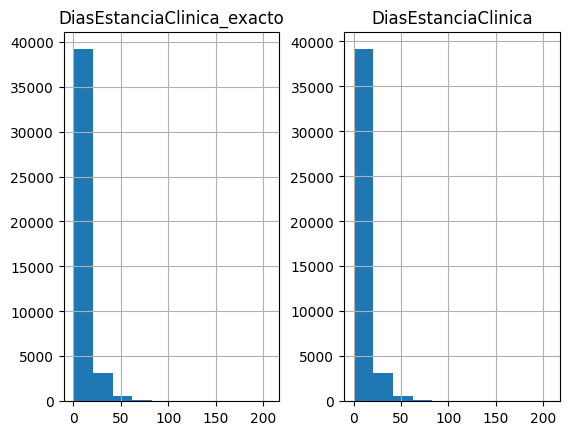

In [303]:
Datos2.hist() #son iguales

Se hace una transformada de los datos de manera logaritmica para obtener una visualización de tipo campana que permita tener una distribución normal, se probó con diferentes transformadas y se terminó eligiendo esta.

<Axes: >

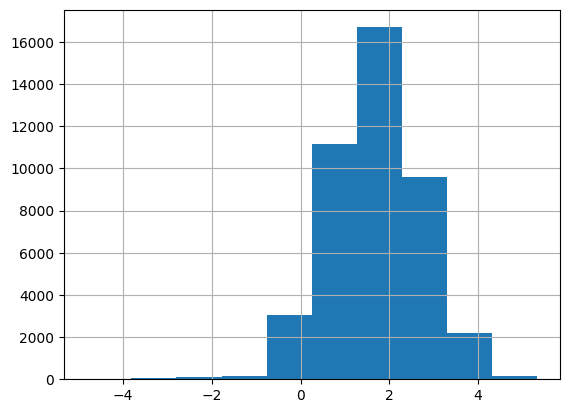

In [304]:
Datos3 = Datos2.iloc[:,0]
Datos3 = np.log(Datos3)
Datos3.replace([np.inf, -np.inf], 0, inplace=True)
Datos3.hist()

Se reemplazan los datos "Sin información" como datos np.NaN y así poder buscarlos de una manera mas sencilla 

In [305]:
DatosConNaN = Datos.replace({'Sin Informacion': np.NaN, 'Sin informacion en base de datos': np.NaN})
DatosConNaN['ClasificacionCronico_DX_MUERTE']

0         NaN
1         NaN
2        epoc
3         NaN
4         NaN
         ... 
43149     NaN
43150     NaN
43151     NaN
43152     NaN
43153     NaN
Name: ClasificacionCronico_DX_MUERTE, Length: 43154, dtype: object

Se filtra (y elimina) las columnas con mas de 50% de NaN, se consideran no representativas

In [306]:
total           = DatosConNaN.isnull().sum().sort_values(ascending=False)
percent         = (DatosConNaN.isnull().sum()/DatosConNaN.isnull().count()*100).sort_values(ascending=False)
missing  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
lista = missing[missing["Percent"]>50].index.tolist()
DatosConNaN.drop(lista, axis= 1, inplace= True)


Se visualiza el resto de columnas con NaN

In [307]:
total           = DatosConNaN.isnull().sum().sort_values(ascending=False)
percent         = (DatosConNaN.isnull().sum()/DatosConNaN.isnull().count()*100).sort_values(ascending=False)
missing  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing.head(13)

,Total,Percent
ClasificacionCronico_DX_F3,11774,27.283682
D_DX_F3,11661,27.021829
ClasificacionCronico_DX_R3,7019,16.265004
D_DX_R3,6905,16.000834
ClasificacionCronico_DX_R2,3532,8.184641
D_DX_R2,3375,7.820828
ClasificacionCronico_DX_R1,967,2.240812
D_DX_R1,723,1.675395
ClasificacionCronico_DX_Medico,225,0.521389
Tipo_Internacion,215,0.498216


Se comprueba que sean iguales, ya que, por alguna extraña razón genera una grafica distinta pero se obtuvo que la suma de las diferencias es 0, demostrando que son iguales.

In [308]:
DatosConNaN2 = DatosConNaN.loc[:,'DiasEstanciaClinica_exacto']
DatosConNaN2 = np.log(DatosConNaN2)
np.sum(Datos3 - DatosConNaN2) #SON IGUALES PERO NO DA LA MISMA GRAFICA

0.0

Se genera un nuevo DF llamado DatosModificados para que este sea la nueva "Base" que se use

In [309]:
DatosModificados = Datos.drop(['DiasEstanciaClinica_exacto','DiasEstanciaClinica'], axis = 1)
DatosModificados['DiasEstanciaClinica_exactoLog'] = DatosConNaN2
DatosModificados.replace({'Sin Informacion': np.NaN, 'Sin informacion en base de datos': np.NaN}, inplace = True)
total           = DatosModificados.isnull().sum().sort_values(ascending=False)
percent         = (DatosModificados.isnull().sum()/DatosModificados.isnull().count()*100).sort_values(ascending=False)
missing  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
lista = missing[missing["Percent"]>50].index.tolist()
DatosModificados.drop(lista, axis= 1, inplace= True)
print(total)


ClasificacionCronico_DX_F3_R3     42246
D_DX_F3_R3                        42242
ClasificacionCronico_DX_F3_R2     41847
D_DX_F3_R2                        41843
ClasificacionCronico_DX_MUERTE    39757
                                  ...  
DX_R2                                 0
DX_R3                                 0
vGenero                               0
DX_F3_R1                              0
DiasEstanciaClinica_exactoLog         0
Length: 72, dtype: int64


Se comprueba que tengan los mismos faltantes que el anterior.

In [310]:
total           = DatosModificados.isnull().sum().sort_values(ascending=False)
percent         = (DatosModificados.isnull().sum()/DatosModificados.isnull().count()*100).sort_values(ascending=False)
missing  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing.head(13)
DatosModificados["D_DX_F3"]

0                                                      NaN
1        ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...
2                                                   DISNEA
3              DELIRIO SUPERPUESTO A UN CUADRO DE DEMENCIA
4          FRACTURA DEL MALAR Y DEL HUESO MAXILAR SUPERIOR
                               ...                        
43149                      EPILEPSIA  TIPO NO ESPECIFICADO
43150        OTRAS ENFERMEDADES DE LAS GLANDULAS SALIVALES
43151                          EPISODIO DEPRESIVO MODERADO
43152                                   CONTUSION DEL CODO
43153            OTRAS CONVULSIONES Y LAS NO ESPECIFICADAS
Name: D_DX_F3, Length: 43154, dtype: object

In [311]:
cdata=DatosModificados.select_dtypes(exclude=["int","float"]).columns


In [312]:
dic = {}
for i in cdata:
    DatosDropNa = DatosModificados[i].dropna(axis = 0)
    dic[i] = DatosDropNa.mode()[0]

DatosModificados.fillna(dic, inplace= True)
DatosModificados["DX_F3"]


0          -1
1        J441
2        R060
3        F051
4        S024
         ... 
43149    G409
43150    K118
43151    F321
43152    S500
43153    R568
Name: DX_F3, Length: 43154, dtype: object


## Codificación de datos

In [61]:
cdata=DatosModificados.select_dtypes(exclude=["int","float"]).columns
dataEncode=DatosModificados
encoder=ps.LabelEncoder()
for i in cdata:
    dataEncode[i]=encoder.fit_transform(dataEncode[i])
dataEncode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43154 entries, 0 to 43153
Data columns (total 72 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   AntencionPaciente llave            43154 non-null  int64  
 1   vGenero                            43154 non-null  int64  
 2   EdadEgreso                         43154 non-null  int64  
 3   Año_Salida                         43154 non-null  int64  
 4   MES                                43154 non-null  int64  
 5   Tipo_Afiliacion                    43154 non-null  int64  
 6   Aseguradora                        43154 non-null  int64  
 7   Modalidad_Contrato                 43154 non-null  int64  
 8   Aseguradora2                       43154 non-null  int64  
 9   Hospitalizacion                    43154 non-null  int64  
 10  bloque                             43154 non-null  int64  
 11  piso                               43154 non-null  int

In [63]:
corr_matrix = dataEncode.corr()
target_corr_df = pd.DataFrame(corr_matrix["DiasEstanciaClinica_exactoLog"].sort_values(ascending=False))
target_corr_df.head(15)

,DiasEstanciaClinica_exactoLog
DiasEstanciaClinica_exactoLog,1.000000
DiasEstanciaServicio,0.671309
Antioboticos,0.357724
Transfusiones,0.337105
UCI_UCE,0.334056
ClasificacionCronico_DX_pre_cx,0.164079
DX_pos_cx,0.161087
ClasificacionCronico_DX_pos_cx,0.160747
DX_pre_cx,0.158057
DX_R3,0.137918


In [65]:
dataEncode=dataEncode[target_corr_df.index[:10]]
dataEncode

,DiasEstanciaClinica_exactoLog,DiasEstanciaServicio,Antioboticos,Transfusiones,UCI_UCE,ClasificacionCronico_DX_pre_cx,DX_pos_cx,ClasificacionCronico_DX_pos_cx,DX_pre_cx,DX_R3
0,0.047392,1,0,0,0,1,0,1,0,1721
1,1.372036,4,0,0,0,1,0,1,0,769
2,0.584829,1,1,0,0,1,0,1,0,794
3,0.941894,1,1,0,0,1,0,1,0,769
4,1.702274,4,0,0,0,1,0,1,0,1858
...,...,...,...,...,...,...,...,...,...,...
43149,0.942048,2,0,0,0,1,0,1,0,1784
43150,0.608355,1,0,0,0,1,0,1,0,496
43151,0.015271,1,0,0,0,1,0,1,0,1640
43152,0.459314,1,1,0,0,0,1217,0,1180,0


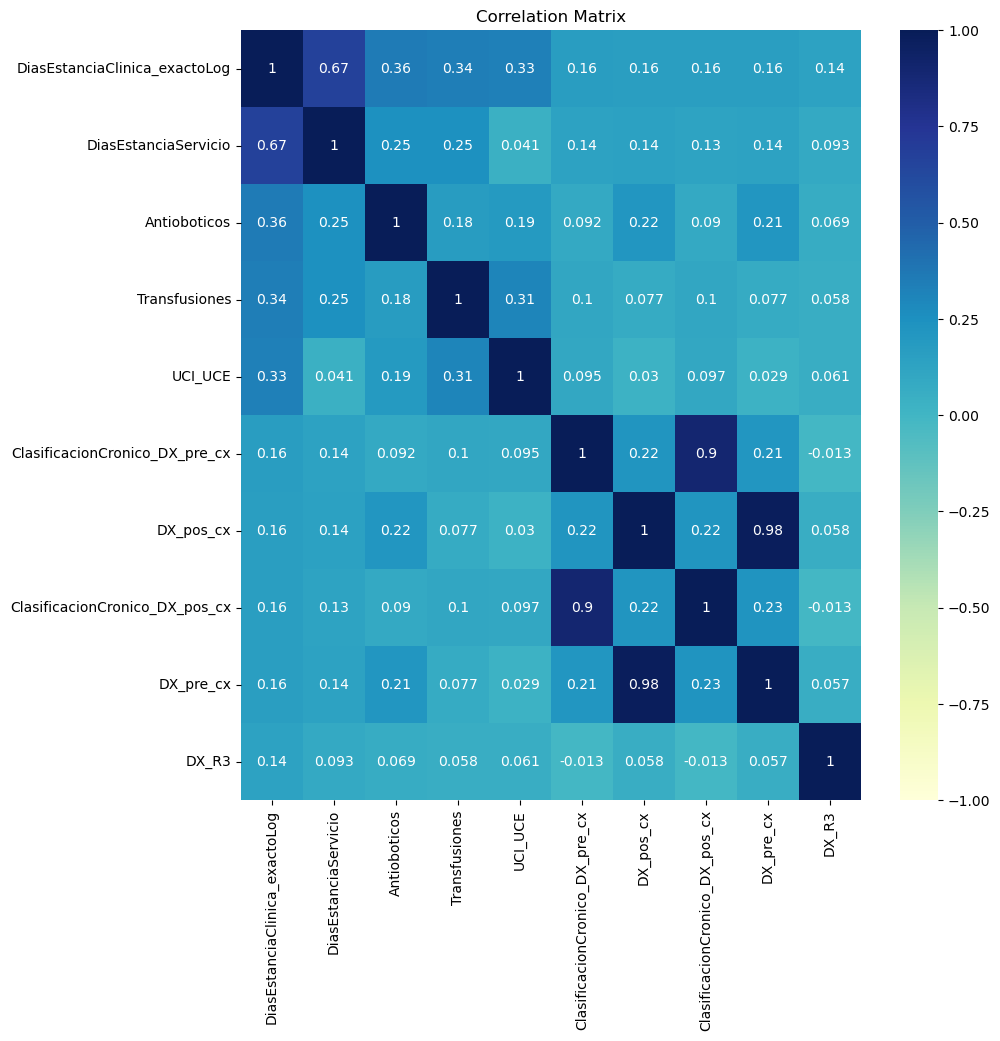

In [69]:
corr_matrix = dataEncode.corr()
target_corr_df = pd.DataFrame(corr_matrix["DiasEstanciaClinica_exactoLog"].sort_values(ascending=False))
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

In [67]:
dataEncode.to_csv("dataEncode.csv",index=False)